# Problem Definition

Analysis of what sorts of people were likely to survive. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Is there any luck involved as description says "Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class".

## Load and check data

In [149]:
# Import the important library for data preprocessing, Input-Output of dataset and data visualization.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# For ignoring warnings generated by Seaborn and Sklearn 
%matplotlib inline
warnings.filterwarnings("ignore")

# Loading data into pandas dataframe
train = pd.read_csv('./train.csv').drop(["Name","Ticket","Cabin"], axis=1)
test  = pd.read_csv('./test.csv').drop(["Name","Ticket", "Cabin"], axis=1)

## Data Exploration

Selected feature for Data Exploration are given below. Sex,Embarked,SibSp and Parch are discrete values where as Age and Fare are continuous values.

In [150]:
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S


### 1. Embarked

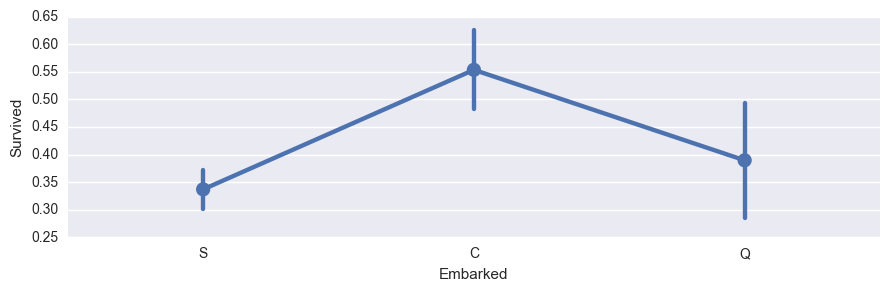

In [151]:
sns.factorplot('Embarked','Survived', data=train,size=3,aspect=3);

In [152]:
print (train['Embarked'].value_counts())
train['Embarked'] = train['Embarked'].fillna('S')

S    644
C    168
Q     77
Name: Embarked, dtype: int64


### 2. Age

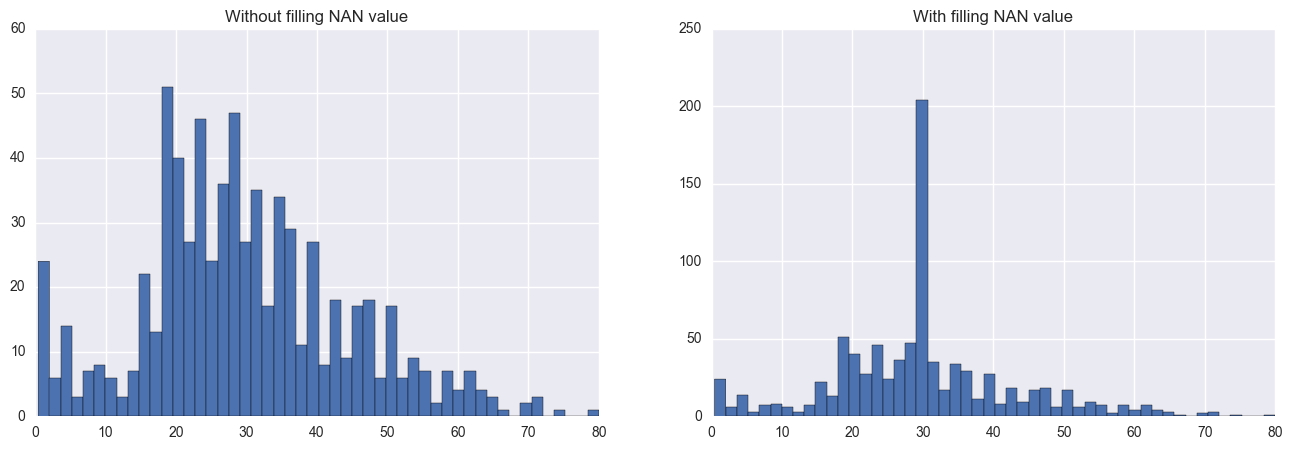

In [153]:
fig, (axis_a,axis_b) = plt.subplots(1,2,figsize=(16,5))

# Filling the NAN value of Age in train dataset
axis_a.set_title('Without filling NAN value')
train.Age.hist(bins=50,ax=axis_a);
train['Age'] = train['Age'].fillna(train['Age'].mean())
axis_b.set_title('With filling NAN value')
train.Age.hist(bins=50,ax=axis_b);

# Filling the NAN value of Age in test dataset
test['Age']  = test['Age'].fillna(test['Age'].mean())

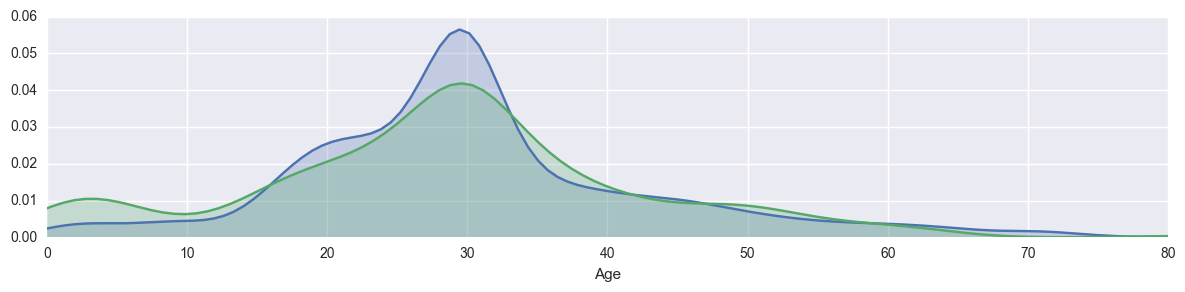

In [154]:
sns.FacetGrid(train, hue="Survived",aspect=4).map(sns.kdeplot,'Age',shade= True).set(xlim=(0, train['Age'].max()));

### 3. Sex

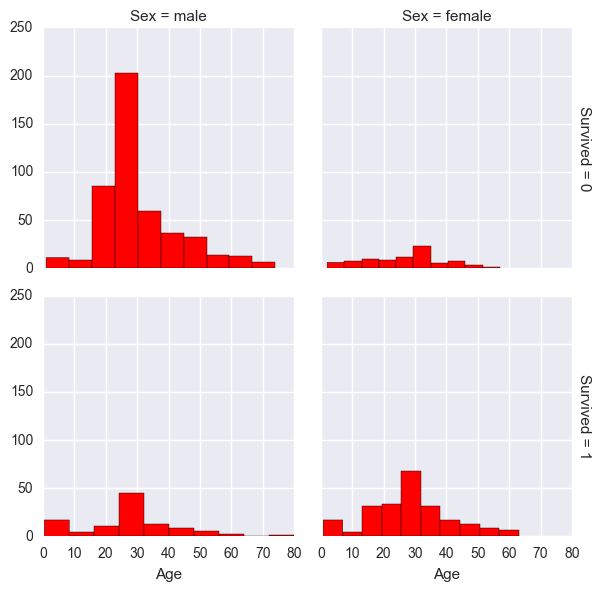

In [155]:
sns.FacetGrid(train, col="Sex", row="Survived", margin_titles=True).map(plt.hist, "Age",color="red");

### 4. Fare

In [156]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

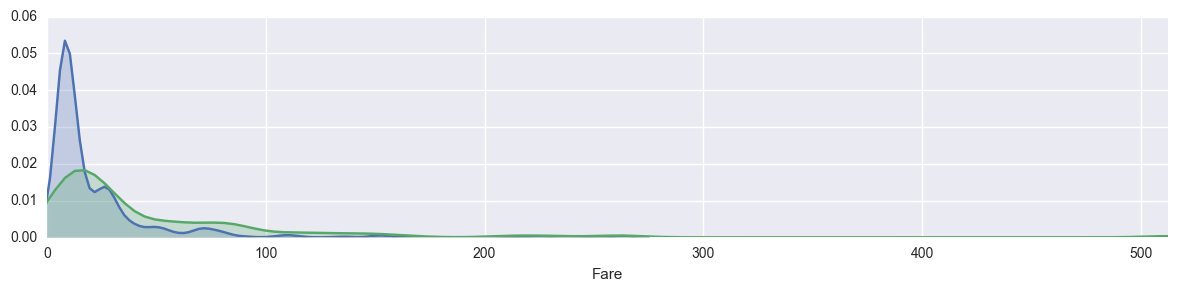

In [157]:
sns.FacetGrid(train,hue="Survived",aspect=4).map(sns.kdeplot,'Fare',shade= True).set(xlim=(0, train['Fare'].max()));

In [158]:
train = train.replace(['male','female'],[0, 1])
train = train.replace(['Q','S','C'],[0, 1, 2])

test = test.replace(['male','female'],[0, 1])
test = test.replace(['Q','S','C'],[0, 1, 2])

In [159]:
X = train.drop(labels=["Survived"], axis=1)
y = train['Survived']

## Data Visualization

We can see that there is high correlation between "Sex and Survived", "Fare and Survived", "Embarked and Survived"

In [184]:
#plt.figure(figsize=(10, 10))
#sns.heatmap(train.corr(), vmax=1, square=True,annot=True,cmap='cubehelix')
#plt.title('Correlation between features');

In [256]:
#Shuffle and split the dataset into the number of training and testing points
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, train_size=0.70, random_state=42)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 623 samples.
Testing set has 268 samples.


In [257]:
# Import the models from sklearn
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import KFold

objects = ('Multi-NB', 'DTs', 'AdaBoost', 'KNN', 'RF')

In [258]:
# function to train classifier
def train_classifier(clf, X_train, y_train):    
    clf.fit(X_train, y_train)

# function to predict features 
def predict_labels(clf, features):
    return (clf.predict(features))

def learning(clf, X_train, y_train, cv=None,):
    size = np.linspace(.1, 1.0, 5)
    score='f1'
    cv = KFold(X_train.shape[0],n_folds= 5,random_state= 42)
    size,train_scores,test_scores=learning_curve(clf,X_train,y_train,cv=cv,scoring=score,n_jobs=1,train_sizes=size)
    train_mean = np.mean(train_scores, axis=1)
    test_mean  = np.mean(test_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    test_std   = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(size,train_mean - train_std,train_mean + train_std, alpha=0.1,color="r")
    plt.fill_between(size,test_mean - test_std,test_mean + test_std, alpha=0.1, color="g")
    plt.plot(size, train_mean, 'o-', color="r",label="Training score")
    plt.plot(size, test_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")

In [259]:
# Initialize the three models
A = MultinomialNB(alpha=1.0,fit_prior=True)
B = DecisionTreeClassifier(random_state=42)
C = AdaBoostClassifier(n_estimators=100)
D = KNeighborsClassifier(n_neighbors=5)
E = RandomForestClassifier(random_state=1,n_estimators=150,min_samples_split=4,min_samples_leaf=2)

In [260]:
# loop to call function for each model
clf = [A,B,C,D,E]
pred_val = [0,0,0,0,0]

for a in range(0,5):
    train_classifier(clf[a], X_train, y_train)
    y_pred = predict_labels(clf[a],X_test)
    pred_val[a] = f1_score(y_test, y_pred,  average='binary')
    print pred_val[a]

0.609137055838
0.706976744186
0.745283018868
0.435294117647
0.730964467005


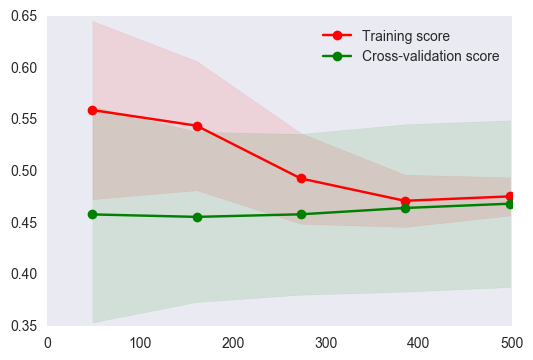

In [261]:
learning(A,X_train, y_train,kf)

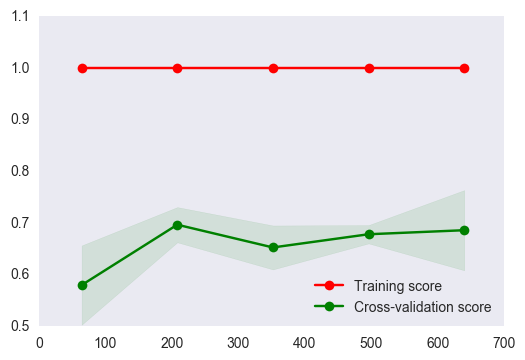

In [243]:
learning(B,X_train, y_train,kf)

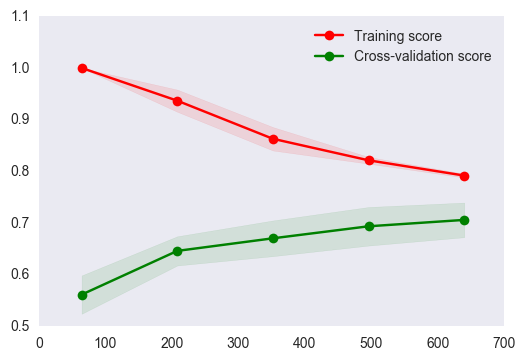

In [244]:
learning(C,X_train, y_train,kf)

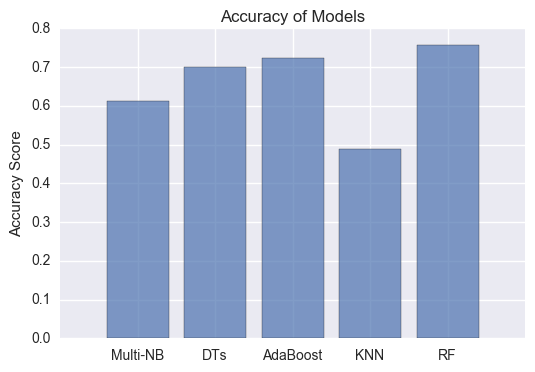

In [166]:
# ploating data for F1 Score
y_pos = np.arange(len(objects))
y_val = [ x for x in pred_val]
plt.bar(y_pos,y_val, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Models')
plt.show()